# Zip Code Analysis
Functions to explore data on a zip code basis.

### Imports
`import csv` used to work with csv files and data.

`from tqdm import tqdm` used to keep progress of lengthy operations.

`import json` used to work with JSON files and data.

`import matplotlib.pyplot as plt` used to created figures and charts.

In [1]:
import csv
from tqdm import tqdm
import json
import matplotlib.pyplot as plt

### Total Zip Analysis
This function is used to create a histogram on how many properties are in every zip code.

In [2]:
def total_zip_analysis(source, output):
    zip_counts = {}

    with open(source, mode="r") as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        zip_wack = []
        for row in tqdm(csv_reader, total=581456):
            zip_code = row["zip_code"].strip()[0:5]
            if zip_code == "":
                zip_wack.append(row["owner_1"].strip())
            if line_count == 0:
                line_count += 1
            if zip_code not in zip_counts.keys():
                zip_counts[zip_code] = 1
                line_count += 1
            else:
                try:
                    zip_count = zip_counts[zip_code]
                    zip_counts[zip_code] = zip_count + 1
                except:
                    print(zip_code, "is missing a count.")
                line_count += 1
    unique_zip_codes = len(zip_counts)
    print(zip_wack)
    print('There are ', unique_zip_codes, 'unique zip codes in this dataset.')

    with open(output, 'w') as file:
        file.write(json.dumps(zip_counts))

In [4]:
total_zip_analysis('../../data_sets/opa_properties_public.csv', '../../data_sets/total_zip_counts.json')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 581417/581456 [00:09<00:00, 58714.95it/s]

['REDEVELOPMENT AUTHORITY', 'TERRY WALTER H JR', 'CSX TRANSPORTATION INC.', 'HABCO INC', 'SCHUYLKILL RIVER', 'CITY OF PHILA', 'REDEVELOPMENT AUTHORITY', 'BALBOA BUILDING 15TH LP', 'L-A BATTERY QOZ LLC', 'LONG WILLIAM E', 'KURLAND SEYMOUR', 'VINE NEW ASSOCIATES LLC', 'CITY BLOCK ACQUISITION XI', 'CONRAIL', 'SKENDAJ DHURATA', 'TRUSTEES OF THE U OF PENN', 'SECOND STREET ASSOCIATES', 'PHILLY HOME OFFICE LLC', 'CLARKE FRANK J', 'SDG TCG WASHINGTON LANE L', 'SUNOCO PIPLINE LP', '1641-43 N 2ND LIMITED LIA', 'CITY OF PHILA', 'FRANKLIN MILLS RESIDUAL', 'UNITED STATES', 'CSX TRANSPORTATION', 'CSX TRANSPORTATION INC.', 'CSX TRANSPORTATION INC.', 'CSX TRANSPORTATION INC', 'GATEWAY COURT LP', 'CONRAIL', 'CONRAIL', 'PHILA BELT LINE R R CO', 'SCHNEIDER STEPHANIE', 'RANKIN SHELLEY', 'REDEVELOPMENT AUTHORITY', 'REDEVELOPMENT AUTHORITY', 'REDEVELOPMENT AUTHORITY', 'CONRAIL', 'CITY OF PHILA', 'NICHOLLS BRUCE T', 'METHODIST HOME FOR CHILDR', 'CITY OF PHILA', 'DAJ 1701 FAIRMOUNT PARTNE', '2 EAST CHESTNUT H

### Total Zip Code Bar Chart
Used to generate a bar chart of the histograms created in `total_zip_code_analysis`.

In [5]:
def total_zip_bar_chart(source):
    total_zip_histogram = json.load(open(source))

    pairs = total_zip_histogram.items()  # [(zip, count), ...]
    pairs = sorted(pairs, key=lambda x: x[0])
    keys = [p[0] for p in pairs]
    values = [p[1] for p in pairs]

    plt.figure(figsize=(12, 6.5))
    plt.title('Total Properties per Zip Code')
    plt.xlabel('Philadelphia Zip Codes')
    plt.ylabel('No. Properties')
    plt.bar(range(len(total_zip_histogram)), values, align='center', width=0.5)
    plt.xticks(range(len(total_zip_histogram)), keys, rotation='vertical')
    plt.show()

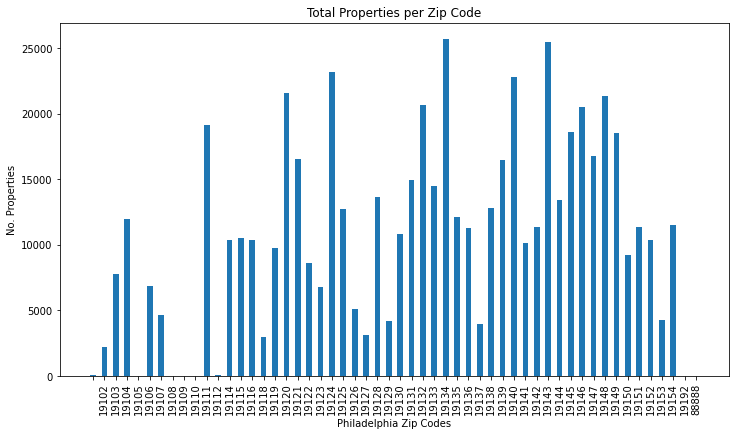

In [6]:
total_zip_bar_chart('../../data_sets/total_zip_counts.json')

### Single Owner Zip Code Analysis
Used to create a histogram on how many properties and owner_1 has in a zip code.

In [5]:
def single_owner_zip_analysis(source, owner_1):
    data = json.load(open(source))

    try:
        print('Getting property list...')
        properties = data[owner_1]['properties']
    except KeyError:
        print("Didn't find ", owner_1)
        return 0

    zip_counts = {}
    for property in tqdm(properties, total=len(properties.keys())):
        property_zip_code = properties[property]['zip_code'].strip()[0:5]
        if property_zip_code not in zip_counts.keys():
            zip_counts[property_zip_code] = 1
        else:
            try:
                zip_count = zip_counts[property_zip_code]
                zip_counts[property_zip_code] = zip_count + 1
            except KeyError:
                print(property_zip_code, "is missing a count.")
    unique_zip_codes = len(zip_counts)
    print('There are ', unique_zip_codes, 'unique zip codes in ', owner_1, "'s properties.")

    json.dump(zip_counts, open(owner_1 + '.json', 'w'))


In [ ]:
single_owner_zip_analysis('./data_sets/landlords_and_properties.json', 'PHILADELPHIA HOUSING AUTH')

### Single Zip Bar Chart
Used to create a bar chart with the results of `single_owner_zip_analysis`.

In [6]:
def single_zip_bar_chart(source, owner_1):
    single_zip_histogram = json.load(open(source))

    pairs = single_zip_histogram.items()  # [(zip, count), ...]
    pairs = sorted(pairs, key=lambda x: x[0])
    keys = [p[0] for p in pairs]
    values = [p[1] for p in pairs]

    plt.figure(figsize=(12, 6.5))
    plt.title(owner_1 + "'s Properties per Zip Code")
    plt.xlabel('Philadelphia Zip Codes')
    plt.ylabel('No. Properties')
    plt.bar(range(len(single_zip_histogram)), values, align='center', width=0.5)
    plt.xticks(range(len(single_zip_histogram)), keys, rotation='vertical')
    plt.show()

In [ ]:
single_zip_bar_chart('./data_sets/PHILADELPHIA HOUSING AUTH.json', 'PHILADELPHIA HOUSING AUTH')

### Generate Single Zip Analysis of Full Dataset
This will generate an object that contains histograms of property distribution in each zip code for each owner_1 in the dataset.

In [7]:
def generate_single_zip_analysis_full(source, output):
    data = json.load(open(source))
    landlord_zip_counts = {}
    for landlord in tqdm(data, total=len(data)):
        try:
            properties = data[landlord]['properties']
        except KeyError:
            print("Didn't find ", landlord)
            return 0
        zip_counts = {}
        for property in properties:
            property_zip_code = properties[property]['zip_code'].strip()[0:5]
            if property_zip_code not in zip_counts.keys():
                zip_counts[property_zip_code] = 1
            else:
                try:
                    zip_count = zip_counts[property_zip_code]
                    zip_counts[property_zip_code] = zip_count + 1
                except KeyError:
                    print(property_zip_code, "is missing a count.")
        landlord_zip_counts[landlord] = zip_counts
    json.dump(landlord_zip_counts, open(output, 'w'))

In [8]:
generate_single_zip_analysis_full('../../data_sets/landlords_and_properties.json', '../../data_sets/landlord_zip_counts.json')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 431505/431505 [00:00<00:00, 573504.84it/s]


### Get Single Zip Code Property Counts
This function will create a histogram of the largest owner_1s in a given zip code. If you wish to truncate the results of this function use `truncate_to_top_n()` located in Data Cleaning.

In [9]:
def get_single_zip_counts(source, zip_code):
    data = json.load(open(source))
    zip_counts = {}
    for landlord in data:
        if zip_code in data[landlord].keys():
            count = data[landlord][zip_code]
            zip_counts[landlord] = count
    sorted_top = {k: v for k, v in sorted(zip_counts.items(), key=lambda item: item[1], reverse=True)}
    return sorted_top

In [ ]:
get_single_zip_counts('./data_sets/landlord_zip_counts.json', '19104')

### Get Zip Code Tops
This function will create a JSON file that contains the top 20 landlords in each zip code.

In [10]:
def get_zip_tops(source, output):
    philly_zip_codes = [
        '19102', '19103', '19104', '19106', '19107', '19109', '19110', '19111', '19112', '19113', '19114', '19115',
        '19116', '19118', '19119', '19120', '19121', '19122', '19123', '19124', '19125', '19126', '19127', '19128',
        '19129', '19130', '19131', '19132', '19133', '19134', '19135', '19136', '19137', '19138', '19139', '19140',
        '19141', '19142', '19143', '19144', '19145', '19146', '19147', '19148', '19149', '19150', '19151', '19152',
        '19153', '19154',
    ]
    zip_dict = {}
    for zip_code in tqdm(philly_zip_codes, total=len(philly_zip_codes)):
        zip_dict[zip_code] = get_single_zip_counts(source, zip_code)
    json.dump(zip_dict, open(output, 'w'))

In [11]:
get_zip_tops('../../data_sets/landlord_zip_counts.json', '../../data_sets/top_in_zip_full.json')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.90it/s]


### Make Zip Code Tops Bar Chart
Used to generate a bar chart with the JSON file created in `get_zip_tops()`.

In [15]:
def make_zip_tops_bar_chart(source):
    data = json.load(open(source))
    for zip_code in tqdm(data, total=len(data)):
        pairs = data[zip_code].items()
        keys = [p[0] for p in pairs]
        values = [p[1] for p in pairs]
        plt.figure(figsize=(12, 8))
        plt.title(zip_code + " Top Owners per Zip Code")
        plt.xlabel('owner_1')
        plt.ylabel('No. Properties')
        plt.bar(range(len(data[zip_code])), values, align='center', width=0.5)
        plt.xticks(range(len(data[zip_code])), keys, rotation='vertical')
        plt.subplots_adjust(bottom=0.4)
        plt.savefig('../../figures/top_in_zip_code/'+zip_code+'.png')
        plt.close()

In [16]:
make_zip_tops_bar_chart('../../data_sets/top_20_in_all_zips.json')

FileNotFoundError: [Errno 2] No such file or directory: '../../data_sets/top_20_in_all_zips.json'

### Format Data for React
This is used to format `get_zip_tops()` in such a way that Victory (the visualization library used on the front end) can understand it.

In [20]:
def format_data_for_react(source, output):
    data = json.load(open(source))
    output_object = {}
    for zip_code in tqdm(data, total=len(data)):
        plot_array = []
        for owner in data[zip_code]:
            plot_array.append({'owner': owner, 'property_count': data[zip_code][owner]})
        output_object[zip_code] = plot_array
    json.dump(output_object, open(output, 'w')) 

In [21]:
format_data_for_react('../../data_sets/top_20_in_all_zips.json', '../../data_sets/zip_code_bar_data.json')

FileNotFoundError: [Errno 2] No such file or directory: '../../data_sets/top_20_in_all_zips.json'

### City Wide Zip Code Distribution for React
Used to create a Victory (FE Visualization Library) readable JSON object of the citywide distribution on owner_1s per zip code.

In [17]:
def city_wide_dist_for_react(source, output):
    data = json.load(open(source))
    output_a = []
    for owner in tqdm(data, total=len(data)):
        output_a.append({'owner': owner[0], 'property_count': owner[1]})
    json.dump(output_a, open(output, 'w'))

In [19]:
city_wide_dist_for_react('../../data_sets/significant_sorted_landlords.json', '../../data_sets/city_wide_dist.json')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 379418.95it/s]
